<a href="https://colab.research.google.com/github/fursew05/DOE/blob/main/%EC%8B%A4%ED%97%98%EA%B3%84%ED%9A%8D%EB%B2%95_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RCBD(Randomized Complete Block Design) -> $T * B$
- 실험설계를 진행할 때 관심있는 treatment 외에 결과에 영향을 줄 수 있는 변수가 있을 때 이를 통제할 수 있다면 사용하는 방법임

- 예를 들어 기계의 팁 재질에 따라 금속 시편이 눌리는 정도를 측정한다고 했을 때,
팁 별로 4번씩 순서를 랜덤하게 관측하여도 금속 시편의 차이로 인해 눌리는 정도 즉 y값에 변화가 있을 수 있다.

- 즉 y값은 팁에 대한 집단평균(tau_i) + 금속 시편의 재질에 대한 집단평균(beta_j) + random error로 표현된다는 것이다.

$$
y_{ijk} = \mu + \tau_i + \beta_j + \varepsilon_{ijk}
$$

- 결과에 대한 오차를 줄이기 위해서는 beta_j를 통제하여야 한다 -> block design

- 기존 ANOVA에서는 SST = SStr + SSE 였지만 Block Design에서는
SST = SStr + SSB + SSE로 표현됨

In [ ]:
import pandas as pd
df = pd.DataFrame(
    {"Extrusion_Pressure" : [8500,8700,8900,9100],
     "Batch of Resin (Block)_1" : [90.3,92.5,85.5,82.5],
     "Batch of Resin (Block)_2" : [89.2,89.5,90.8,89.5],
     "Batch of Resin (Block)_3" : [98.2,90.6,89.6,85.6],
     "Batch of Resin (Block)_4" : [93.9,94.7,86.2,87.4],
     "Batch of Resin (Block)_5" : [87.4,87.0,88.0,78.9],
     "Batch of Resin (Block)_6" : [97.9,95.8,93.4,90.7]})
df = df.set_index("Extrusion_Pressure")

df_long = df.melt(ignore_index=False, var_name="Batch", value_name="Response").reset_index()
df_long

,Extrusion_Pressure,Batch,Response
0,8500,Batch of Resin (Block)_1,90.3
1,8700,Batch of Resin (Block)_1,92.5
2,8900,Batch of Resin (Block)_1,85.5
3,9100,Batch of Resin (Block)_1,82.5
4,8500,Batch of Resin (Block)_2,89.2
5,8700,Batch of Resin (Block)_2,89.5
6,8900,Batch of Resin (Block)_2,90.8
7,9100,Batch of Resin (Block)_2,89.5
8,8500,Batch of Resin (Block)_3,98.2
9,8700,Batch of Resin (Block)_3,90.6


In [ ]:
### CRD 가정 하에서 ANOVA 수행 시
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Response ~ C(Extrusion_Pressure)",data=df_long).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(Extrusion_Pressure),178.171250,3.0,3.931339,0.023448
Residual,302.138333,20.0,NaN,NaN


In [ ]:
### RCBD 가정 하에서 ANOVA 수행 시(batch of resin 고려)
model = ols("Response ~ C(Extrusion_Pressure) + C(Batch)",data=df_long).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(Extrusion_Pressure),178.171250,3.0,8.107077,0.001916
C(Batch),192.252083,5.0,5.248666,0.005532
Residual,109.886250,15.0,NaN,NaN


- CRD의 SSE는 302.14 RCBD에서 SSE는 109.89로 랜덤 오차를 줄일 수 있음

- ANOVA에서 진행하는 F 검정은 (SStr/df_SStr)/(SSE/df_SSE)로 SSE가 블록효과로 인해 커지게 되면 검정통계량 값이 작아지면서 검정결과가 왜곡될 수 있음

- CRD에서는 실험 배치 요인인 Extrusion_Pressure에 처리 간 차이가 없다는 결론이 나오지만, RCBD 에서는 유의수준 5%하에서 pvalue가 0.0019로 귀무가설을 기각하여
차이가 존재한다는 결론을 낼 수 있음

- 즉,y값에 영향을 줄 수 있는 관심이 없는 요인들을 배제하고 관심이 있는 요인에 대해서 더 정확한 결과를 얻을 수 있음

### Latin Square Design -> $T^2$
- y값에 영향을 주는 변수들이 많아지고 변수에 대한 level이 많을 수록 CRD를 진행하기 힘듬

- 일원배치 분산분석을 진행할 때 관심이 있는 처리요인 1개와 블록요인이 2개일 때 사용하는 방법으로 행과 열에 각각 블록요인을 배치하는 방법임

- 이때 처리요인의 수준과 블록요인의 수준 수가 같아야 함

In [ ]:
import numpy as np

# 처리 요인 수준 5개
treatments = np.array([
    ['A','B','C','D','E'],
    ['E','A','B','C','D'],
    ['D','E','A','B','C'],
    ['C','D','E','A','B'],
    ['B','C','D','E','A']

])

responses = np.array([
    [24, 20, 19, 24, 24],
    [17, 24, 30, 27, 36],
    [18, 38, 26, 27, 21],
    [26, 31, 26, 23, 22],
    [22, 30, 20, 29, 31]
])


# 블록 요인1 수준 5개
rows = ['R1','R2','R3','R4','R5']
# 블록 요인2 수준 5개
cols = ['C1','C2','C3','C4','C5']

# 빈 DataFrame 생성
df_list = []

for i, row in enumerate(rows):
    for j, col in enumerate(cols):
        treatment = treatments[i,j]
        response = responses[i,j]
        df_list.append([row, col, treatment, response])

df_latin = pd.DataFrame(df_list, columns=['Row','Column','Treatment','Response'])
df_latin

,Row,Column,Treatment,Response
0,R1,C1,A,24
1,R1,C2,B,20
2,R1,C3,C,19
3,R1,C4,D,24
4,R1,C5,E,24
5,R2,C1,E,17
6,R2,C2,A,24
7,R2,C3,B,30
8,R2,C4,C,27
9,R2,C5,D,36


In [ ]:
# anova 테이블 작성

model = ols("Response ~ C(Treatment) + C(Row) + C(Column)",data=df_latin).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(Treatment),21.2,4.0,0.145604,0.961483
C(Row),68.0,4.0,0.467033,0.758990
C(Column),150.0,4.0,1.030220,0.431040
Residual,436.8,12.0,NaN,NaN


### BIBD (Balanced Incomplete Block Design)
- 각 처리수준에 대한 모든 블록 수준을 모두 실험하지 않고 불완전하게 실험을 진행
- 블록수준 관점에서도 각 블록마다 모든 treatment를 보지 않고 실험을 진행
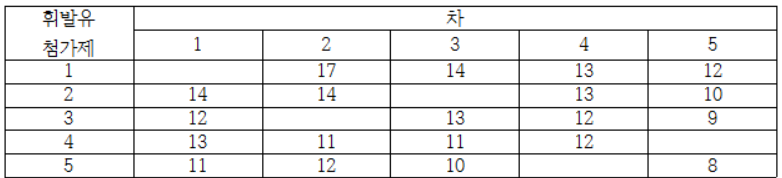

- 각각의 treatment와 block에 대해서 동일하게 실험하되 모든 실험을 하지는 x
- 위에서 표와 같이 휘발유 첨가제 수준에 따라서 4번씩 실험했고, 블록 요인인 차에 대해서도 수준마다 4번씩 실험했음

In [ ]:
bibd_df = pd.DataFrame(
    {"trt" : [2,3,4,5,1,2,4,5,1,3,4,5,1,2,3,4,1,2,3,5],
     "block" : [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5],
     "y" : [14,12,13,11,17,14,11,12,14,13,11,10,13,13,12,12,12,10,9,8]}
)
bibd_df

,trt,block,y
0,2,1,14
1,3,1,12
2,4,1,13
3,5,1,11
4,1,2,17
5,2,2,14
6,4,2,11
7,5,2,12
8,1,3,14
9,3,3,13


In [ ]:
# anova 테이블 작성
model = ols("y ~ C(trt) + C(block)",data=bibd_df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(trt),35.733333,4.0,9.810316,0.001247
C(block),35.233333,4.0,9.673045,0.001321
Residual,10.016667,11.0,NaN,NaN


- 유의수준 5%에서 귀무가설을 기각하여 휘발유 첨가제에 따른 y값에 차이가 있다는 것을 확인할 수 있음